In [7]:
import jax.numpy as jnp
import genjax
from model import *

Generating animation
Saving animation...


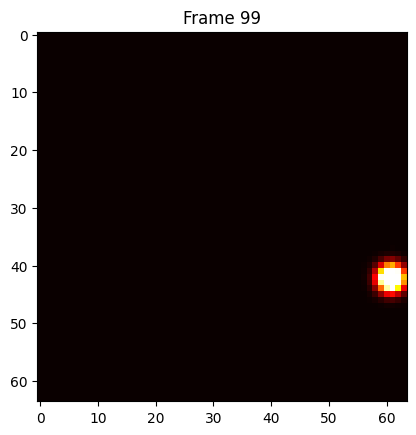

In [9]:

key = jax.random.PRNGKey(412)
key, subkey = jax.random.split(key)
max_fireflies = jnp.arange(1, 5)
scene_size = 64
steps = jnp.arange(10)

multi_model_jit = jax.jit(multifirefly_model.simulate)
tr = multi_model_jit(subkey, (scene_size, max_fireflies,))

key, subkey = jax.random.split(key)
tr = multi_model_jit(subkey, (scene_size, max_fireflies,))
chm = tr.get_sample()

print("Generating animation")
frames = get_frames(chm)
ani = animate(frames, 20)
print("Saving animation...")
ani.save("firefly_simulation_maxglowsize_2.gif", writer="imagemagick", fps=20)
plt.show()


In [ ]:

def importance_sample_test():
    test_obs = jnp.ones((100, 64, 64))
    chm = C["observations", "pixels"].set(chm["observations", "pixels"])
    print(chm)

    key, subkey = jax.random.split(key)
    tr, _ = multifirefly_model.importance(subkey, chm, (scene_size, max_fireflies,))
    print(tr.get_score())